In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [4]:
X

array([[ 2.40130973,  5.38931381],
       [-6.57259672, -0.36535158],
       [-7.34869269, -1.92126175],
       ...,
       [ 2.72317165,  0.36675115],
       [ 2.38416677, -2.15817207],
       [-6.68977542, -3.03693515]])

In [5]:
y

array([0, 1, 1, 2, 1, 1, 1, 1, 0, 2, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 2, 1, 0, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1,
       0, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 0, 0, 2, 2, 0, 1, 1, 0, 2, 2, 0,
       1, 1, 2, 2, 2, 1, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0,
       0, 1, 1, 1, 0, 2, 0, 2, 2, 2, 0, 1, 1, 1, 2, 1, 0, 0, 2, 1, 1, 0,
       2, 1, 1, 1, 1, 1, 2, 0, 2, 1, 1, 2, 1, 2, 0, 1, 0, 1, 0, 2, 2, 1,
       0, 1, 2, 0, 2, 1, 1, 1, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 2, 1, 2, 2,
       1, 1, 0, 1, 0, 1, 2, 0, 1, 2, 1, 0, 0, 1, 0, 1, 2, 1, 1, 0, 2, 2,
       0, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 2, 2, 1, 0, 1, 0, 2, 2, 1, 0,
       2, 0, 0, 2, 0, 1, 0, 1, 0, 2, 0, 0, 2, 0, 1, 2, 1, 2, 2, 1, 0, 2,
       0, 0, 0, 1, 0, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 2, 0, 1, 0, 2, 1, 0,
       0, 0, 0, 2, 0, 0, 0, 1, 2, 1, 1, 0, 0, 0, 2, 1, 1, 0, 1, 0, 1, 2,
       1, 0, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2,

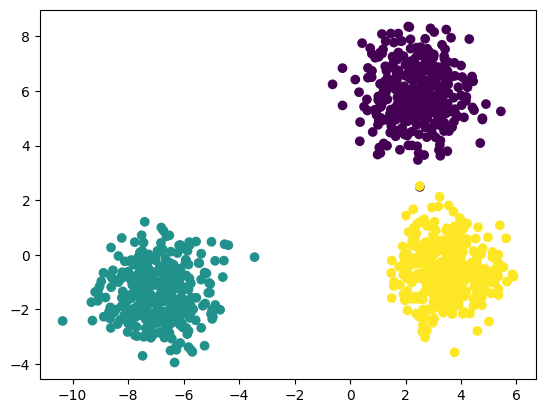

In [7]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [10]:
## standardization -- feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [12]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [13]:
from sklearn.cluster import KMeans

In [14]:
## Elbow method to Select the K value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [15]:
wcss

[1339.999999999999,
 614.628398991125,
 87.53998093936139,
 73.37829867470114,
 62.34484884241898,
 58.18051571330557,
 44.02330132880106,
 41.590319911387304,
 36.56270448776542,
 31.66572576368067]

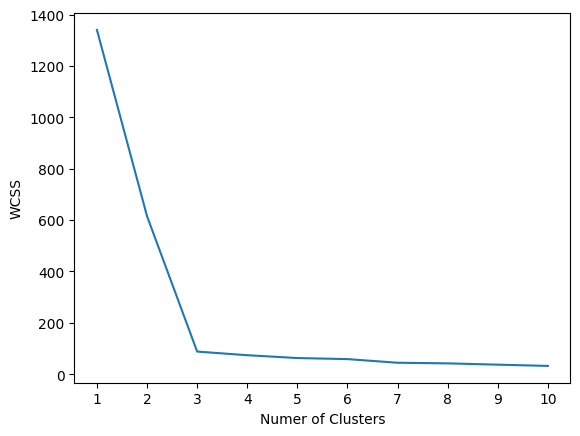

In [19]:
## plot the elbow curve
plt.plot(range(1,11),wcss)
plt.xlabel('Numer of Clusters')
plt.xticks(range(1,11)) #his parameter is the list of xtick locations.
plt.ylabel('WCSS')
plt.show()

In [20]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [21]:
kmeans.fit_predict(X_train_scaled)

array([0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 0, 1, 0, 1, 2, 1, 0, 2, 1, 1,
       2, 2, 1, 2, 0, 1, 2, 1, 0, 0, 1, 2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 1, 0, 2, 2, 2, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 2, 1, 2, 1, 0, 2, 0, 0, 2, 0, 2, 2, 2, 1, 1,
       1, 1, 1, 2, 1, 0, 1, 0, 1, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 1, 2, 0,
       0, 0, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 2, 0, 1, 2, 0, 0, 1, 1,
       0, 1, 0, 1, 2, 1, 2, 1, 0, 0, 0, 1, 2, 0, 1, 1, 2, 2, 1, 2, 1, 0,
       1, 1, 2, 2, 2, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 1, 1, 1, 1, 1, 0,
       0, 2, 1, 0, 0, 2, 1, 2, 1, 0, 2, 1, 1, 2, 0, 2, 2, 2, 2, 1, 2, 1,
       0, 1, 0, 2, 1, 1, 1, 2, 1, 0, 0, 2, 2, 1, 1, 0, 0, 1, 2, 0, 2, 2,
       2, 0, 1, 1, 0, 1, 1, 2, 0, 2, 2, 1, 1, 1, 2, 0, 1, 2, 2, 2, 1, 0,
       1, 0, 0, 1, 1, 0, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 0, 1, 0, 2, 2,
       0, 2, 2, 2, 0, 1, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 1, 0,
       1, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 1,

In [22]:
y_pred=kmeans.predict(X_test_scaled)

In [23]:
y_pred

array([1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 1, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 0,
       2, 2, 0, 0, 2, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 0, 1, 0, 0, 0, 1, 2,
       0, 2, 1, 0, 2, 1, 0, 1, 0, 0, 0, 1, 2, 1, 2, 2, 1, 0, 0, 1, 1, 2,
       1, 2, 2, 2, 2, 0, 1, 1, 0, 1, 1, 2, 0, 2, 1, 2, 2, 2, 0, 0, 0, 0,
       0, 2, 1, 0, 1, 1, 0, 2, 2, 1, 1, 0, 1, 0, 0, 2, 0, 1, 2, 2, 1, 0,
       2, 2, 1, 2, 0, 1, 1, 0, 2, 0, 1, 2, 1, 2, 0, 2, 1, 0, 2, 0, 0, 1,
       2, 2, 1, 1, 2, 2, 2, 0, 1, 0, 1, 2, 0, 0, 1, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 0, 2, 1, 0, 1, 0, 0, 1, 2, 1, 2, 1,
       2, 1, 0, 1, 1, 2, 1, 1, 0, 1, 0, 1, 0, 1, 2, 0, 0, 2, 2, 0, 1, 0,
       1, 2, 0, 0, 1, 2, 1, 1, 1, 0, 0, 1, 1, 1, 2, 0, 2, 2, 1, 2, 1, 0,
       2, 2, 0, 0, 0, 1, 1, 2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 0, 0, 1, 0, 0,
       0, 1, 2, 2, 1, 2, 2, 1, 1, 0, 0, 2, 0, 1, 2, 1, 2, 1, 2, 0, 2, 2,
       1, 1, 0, 0, 2, 1, 2, 0, 0, 1, 0, 0, 0, 2, 2, 1, 1, 2, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 2, 2, 2, 1, 1, 1, 1, 2,

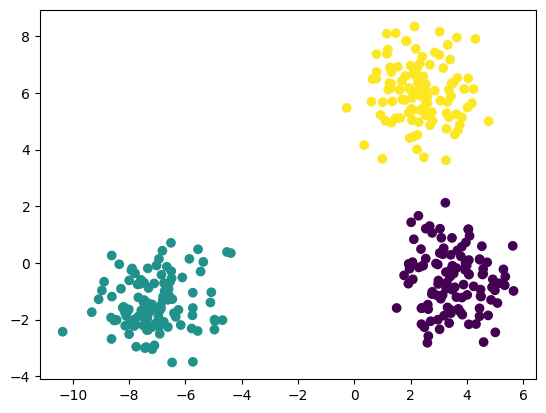

In [24]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

validating the k value

1. kneelocator

2. Silhoute scoring

In [25]:
## kneelocator
!pip install kneed


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
from kneed import KneeLocator

In [27]:
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')

In [28]:
kl.elbow

3

In [29]:
#silhoutte score
from sklearn.metrics import silhouette_score

In [30]:
silhouette_coefficent=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficent.append(score)

In [31]:
silhouette_coefficent

[0.6239647385318647,
 0.7680503497057255,
 0.6265318084170023,
 0.49404781629492345,
 0.3837051002435399,
 0.3583037015638742,
 0.3599206871790446,
 0.33425398831863506,
 0.34796191693645084]

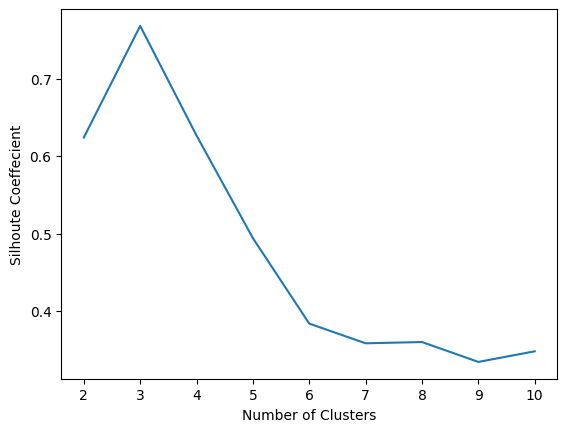

In [32]:
## plotting silhouette score

plt.plot(range(2,11),silhouette_coefficent)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhoute Coeffecient")
plt.show()

**The one with the highest value of Silhoutte Coefficent give the ideal number of cluster for the problem statement.**